In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
from numpy.random import shuffle
import pandas as pd
from scipy.stats import gaussian_kde
from scipy.ndimage import gaussian_filter,extrema
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
from scipy.ndimage import zoom
from scipy.spatial.distance import pdist
import seaborn as sns
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.colors import ListedColormap
import matplotlib as mpl


from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.path import Path
from matplotlib.collections import LineCollection
from sklearn.decomposition import PCA
from scipy.stats import entropy
from sklearn.cluster import AgglomerativeClustering,DBSCAN,OPTICS
import scipy.linalg as la
from mpl_toolkits.mplot3d import Axes3D

/public/apps/python/3.7.0/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


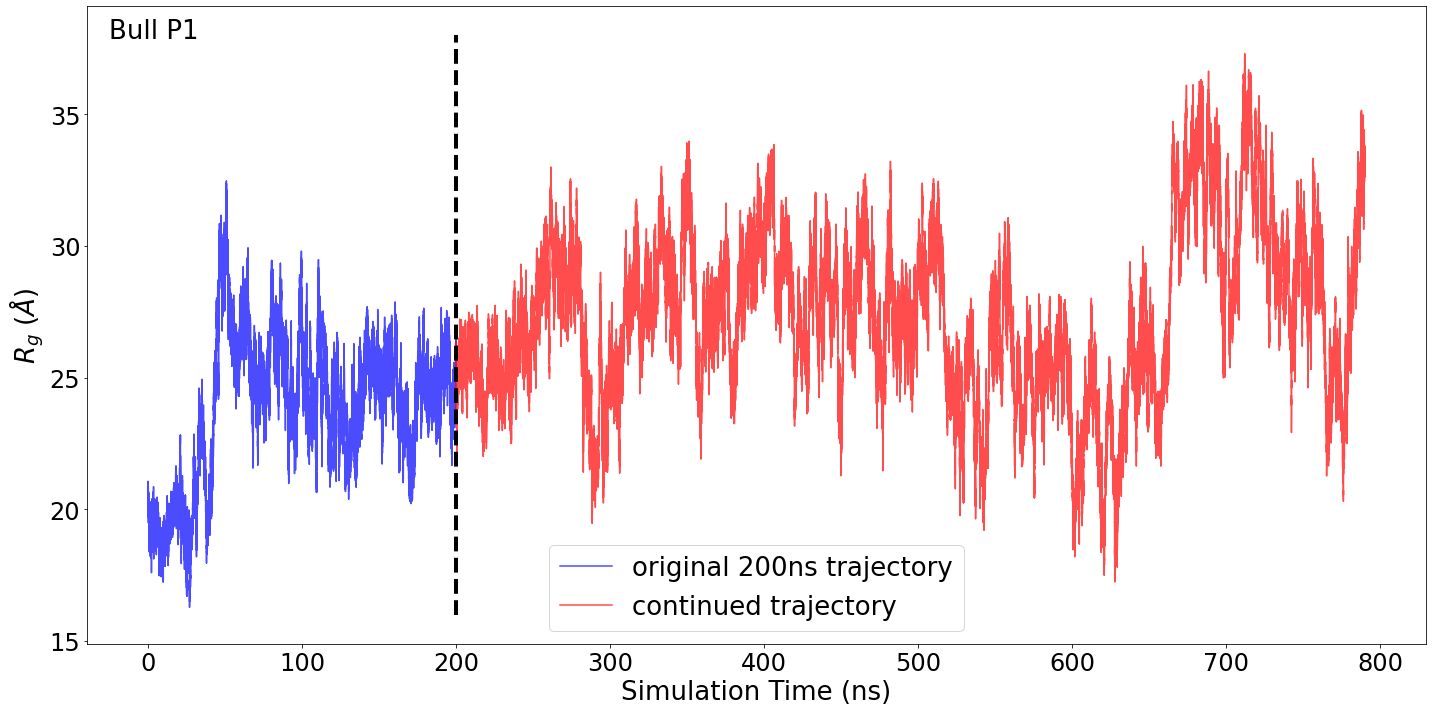

In [2]:
#continued from 8th simulation with same seed, same starting velocities
bull_rg_oldff=pd.read_csv('bull_Rg_fourth_oldff.csv')
bull_rg_fourth=pd.read_csv('bull_Rg_master_out.csv').iloc[:,:3]
fig,ax = plt.subplots(figsize=(20,10))
plt.plot(bull_rg_fourth[bull_rg_fourth.sim==4].frames.values/500,
         bull_rg_fourth[bull_rg_fourth.sim==4].Rg.values,color='blue',label='original 200ns trajectory',
        alpha=0.7)
plt.plot((bull_rg_oldff.frames.values/500)+200,
         bull_rg_oldff.Rg.values,label='continued trajectory',
         alpha=0.7,color='red')
cutoff = 100000/500
plt.plot([cutoff,cutoff],[16,38],color='black',
         linestyle='dashed', linewidth=4)
plt.xlabel('Simulation Time (ns)',size=26)
plt.ylabel(r'$R_{g}$'+' ('+r'$\AA$'+')',size=26)
plt.text(0.05,0.95,'Bull P1',fontsize=26,      horizontalalignment='center',         transform=ax.transAxes)
plt.setp(ax.get_yticklabels(), fontsize=24)
plt.setp(ax.get_xticklabels(), fontsize=24)
plt.legend(fontsize=26)
plt.tight_layout()
plt.savefig('figures_for_publication/bull_rg_longsim.png',dpi=400,bbox_inches='tight')
#plt.xlim(200,200

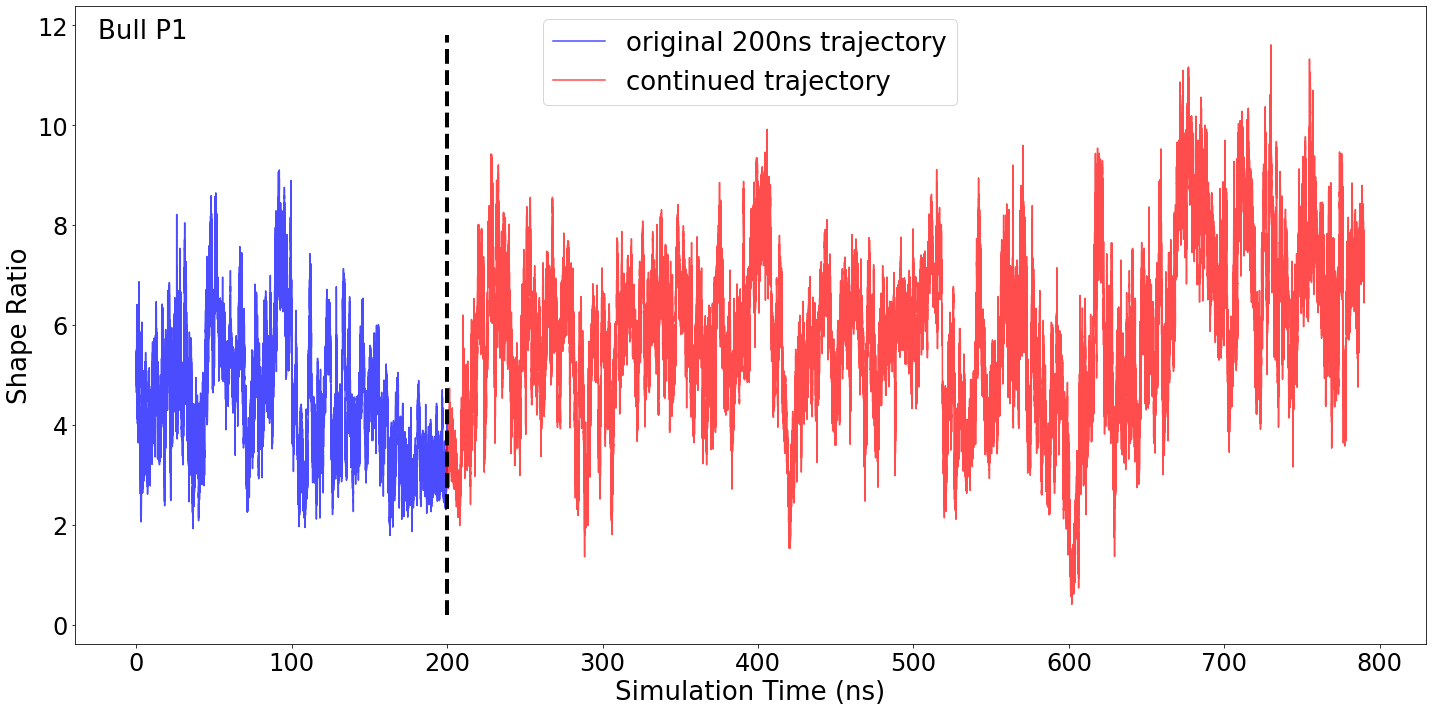

In [4]:
#continued from 8th simulation with same seed, same starting velocities
bull_rg_oldff=pd.read_csv('bull_Rg_fourth_oldff.csv')
bull_rg_fourth=pd.read_csv('bull_Rg_master_out.csv').iloc[:,:3]
bull_ree_oldff=pd.read_csv('bull_Ree_fourth_oldff.csv')
bull_ree_fourth=pd.read_csv('bull_Ree_master_out.csv').iloc[:,:3]
bull_rg_ree_oldff=pd.concat([bull_rg_oldff,bull_ree_oldff['Ree']],axis=1)
bull_rg_ree_fourth=pd.concat([bull_rg_fourth,bull_ree_fourth['Ree']],axis=1)
#use below two dataframes for plotting
bull_rg_ree_oldff['ratio']=bull_rg_ree_oldff.Ree.values**2/bull_rg_ree_oldff.Rg.values**2
bull_rg_ree_fourth['ratio']=bull_rg_ree_fourth.Ree.values**2/bull_rg_ree_fourth.Rg.values**2

fig,ax = plt.subplots(figsize=(20,10))
plt.plot(bull_rg_ree_fourth[bull_rg_ree_fourth.sim==4].frames.values/500,
         bull_rg_ree_fourth[bull_rg_ree_fourth.sim==4].ratio.values,color='blue',label='original 200ns trajectory',
        alpha=0.7)
plt.plot((bull_rg_ree_oldff.frames.values/500)+200,
         bull_rg_ree_oldff.ratio.values,label='continued trajectory',
         alpha=0.7,color='red')
cutoff = 100000/500
plt.plot([cutoff,cutoff],[0.2,11.8],color='black',
         linestyle='dashed', linewidth=4)
plt.xlabel('Simulation Time (ns)',size=26)
plt.ylabel('Shape Ratio',size=26)
plt.text(0.05,0.95,'Bull P1',fontsize=26,      horizontalalignment='center',         transform=ax.transAxes)
plt.setp(ax.get_yticklabels(), fontsize=24)
plt.setp(ax.get_xticklabels(), fontsize=24)
plt.legend(fontsize=26)
plt.tight_layout()
plt.savefig('figures_for_publication/bull_ratio_longsim.png',dpi=400,bbox_inches='tight')
#plt.xlim(200,200

CPU times: user 0 ns, sys: 1 µs, total: 1 µs
Wall time: 4.29 µs


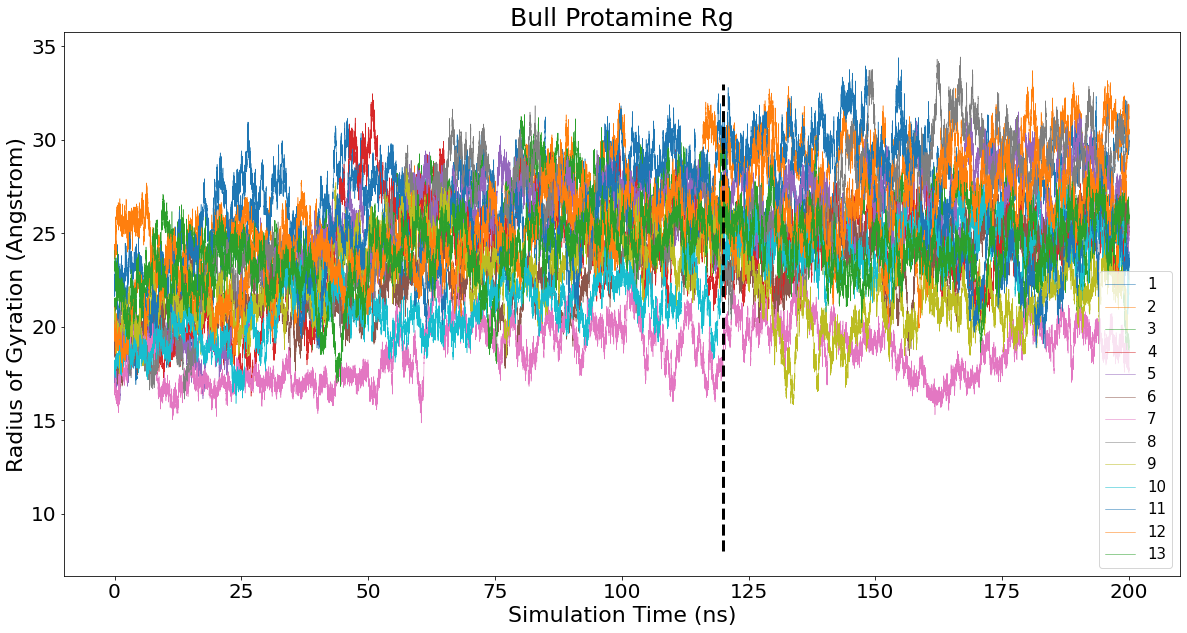

In [2]:
%time
bull_rg=pd.read_csv("bull_Rg_master_out.csv")
remove_sims=[14,15]
bull_rg=bull_rg[bull_rg.sim!=remove_sims[0]]
bull_rg=bull_rg[bull_rg.sim!=remove_sims[1]]
fig,ax = plt.subplots(figsize=(20,10))
temp_bull=bull_rg.copy()
for sim in temp_bull.sim.unique():
    ax.plot(temp_bull[temp_bull.sim==sim].frames.values/500,
            temp_bull[temp_bull.sim==sim].Rg.values,label=str(sim),
            linewidth=0.5)
ax.legend(fontsize=15)
ax.set_title('Bull Protamine Rg',fontsize=25)
ax.set_xlabel('Simulation Time (ns)',fontsize=22)
ax.set_ylabel('Radius of Gyration (Angstrom)',fontsize=22)
#ax.set_xlim(0,201)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
cutoff = 60000/500
ax.plot([cutoff,cutoff],[8,33],linewidth = 3, color='black',linestyle='dashed')
del temp_bull

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


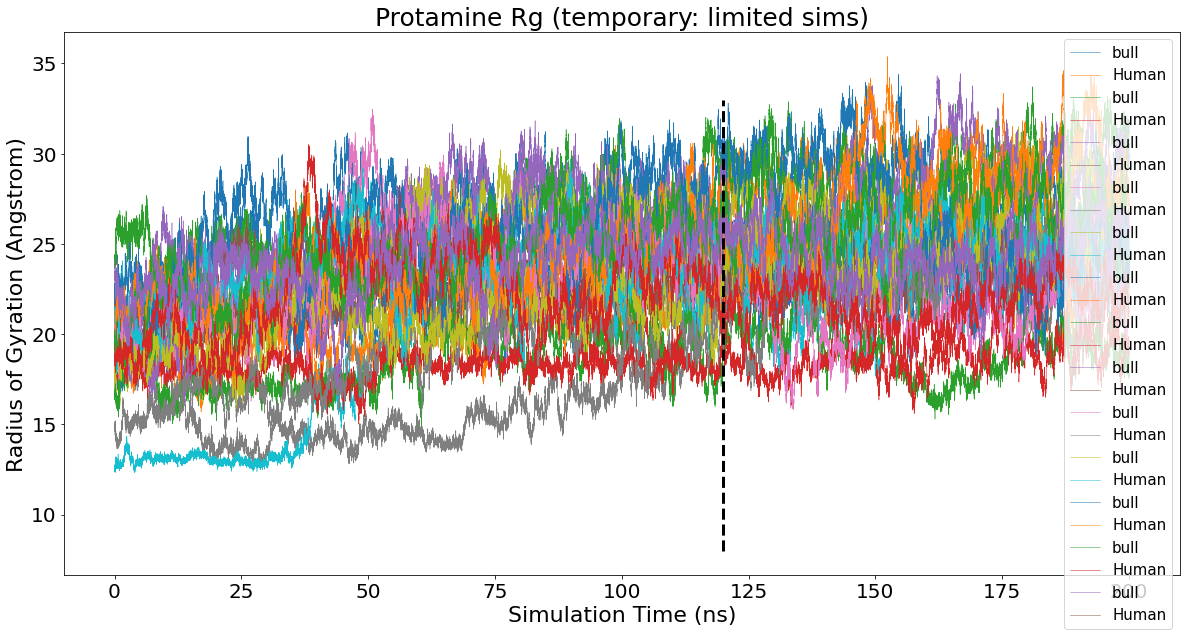

In [5]:
%time
remove_sims=[13,15]#for human p1
p1_rg=pd.read_csv("p1_rg.csv")
p1_rg=p1_rg[p1_rg.sim!=remove_sims[0]]
p1_rg=p1_rg[p1_rg.sim!=remove_sims[1]]
bull_rg=pd.read_csv("bull_Rg_master_out.csv")
remove_sims=[14,15]#for bull p1
bull_rg=bull_rg[bull_rg.sim!=remove_sims[0]]
bull_rg=bull_rg[bull_rg.sim!=remove_sims[1]]
fig,ax = plt.subplots(figsize=(20,10))
temp_bull=bull_rg.copy()
temp_p1=p1_rg.copy()
for sim in temp_bull.sim.unique():
    ax.plot(temp_bull[temp_bull.sim==sim].frames.values/500,
            temp_bull[temp_bull.sim==sim].Rg.values,label='bull',
            linewidth=0.5)
    ax.plot(temp_p1[temp_p1.sim==sim].frames.values/500,
            temp_p1[temp_p1.sim==sim].Rg.values,label='Human',
            linewidth=0.5)
ax.legend(fontsize=15)
ax.set_title('Protamine Rg (temporary: limited sims)',fontsize=25)
ax.set_xlabel('Simulation Time (ns)',fontsize=22)
ax.set_ylabel('Radius of Gyration (Angstrom)',fontsize=22)
#ax.set_xlim(0,201)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
cutoff = 60000/500
ax.plot([cutoff,cutoff],[8,33],linewidth = 3, color='black',linestyle='dashed')
del temp_bull

In [3]:
bull_ree=pd.read_csv("bull_Ree_master_out.csv")
bull_rg_ree=pd.concat([bull_rg,bull_ree.iloc[:,2:]],axis=1)
del bull_ree, bull_rg

In [4]:
bull_rg_ree['ratio']=bull_rg_ree.Ree.values**2/bull_rg_ree.Rg.values**2

In [5]:
blank_df = pd.DataFrame()
for sim in bull_rg_ree.sim.unique():
    temp_df = bull_rg_ree[bull_rg_ree.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
bull_rg_ree = blank_df.copy()
del blank_df
del temp_df

In [6]:
#need to remove frames and simulations that are not necessary
#only show equilibrated part
#this is for p1
p1_rg = pd.read_csv("p1_rg.csv")
p1_ree = pd.read_csv("p1_ree.csv")
p1_rg_ree=pd.concat([p1_rg,p1_ree['Ree']],axis=1)
p1_rg_ree=p1_rg_ree[p1_rg_ree.sim!=15]
p1_rg_ree=p1_rg_ree[p1_rg_ree.sim!=13]
blank_df = pd.DataFrame()
for sim in p1_rg_ree.sim.unique():
    temp_df = p1_rg_ree[p1_rg_ree.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
p1_rg_ree = blank_df.copy()
del blank_df
del temp_df

In [7]:
#need to remove frames and simulations that are not necessary
#only show equilibrated part
#this is for salmon
salmon_rg = pd.read_csv("salmon_rg.csv").iloc[:,:3]
salmon_ree = pd.read_csv("salmon_ree.csv")
salmon_rg_ree=pd.concat([salmon_rg,salmon_ree['Ree']],axis=1)
salmon_rg_ree=salmon_rg_ree[salmon_rg_ree.sim!=2]
salmon_rg_ree=salmon_rg_ree[salmon_rg_ree.sim!=11]
#this step is because some salmon simulations have more than 200ns
temp_df=salmon_rg_ree.copy()
for sim in temp_df.sim.unique():
    n=temp_df[temp_df.sim==sim].frames.max()-100000
    if n>0:
        temp_df.drop(temp_df[temp_df.sim==sim].tail(n).index,inplace=True)
salmon_rg_ree=temp_df.copy()
del temp_df
#this step is taking last 40000 frames i.e. equilibrated portion
blank_df = pd.DataFrame()
for sim in salmon_rg_ree.sim.unique():
    temp_df = salmon_rg_ree[salmon_rg_ree.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
salmon_rg_ree = blank_df.copy()
del blank_df
del temp_df

In [8]:
p1_rg_ree_hier=p1_rg_ree.copy()
p1_rg_ree_hier['ratio']=p1_rg_ree_hier.Ree.values**2/p1_rg_ree_hier.Rg.values**2
p1_rg_ree_hier

,frames,sim,Rg,Ree,ratio
60000,60001,1,28.1333,70.9610,6.362065
60001,60002,1,28.0252,71.5204,6.512720
60002,60003,1,28.0709,70.5204,6.311271
60003,60004,1,27.8865,69.2119,6.159898
60004,60005,1,27.9361,69.9112,6.262705
...,...,...,...,...,...
1399995,99996,14,23.9297,69.6266,8.465953
1399996,99997,14,23.8227,69.1996,8.437722
1399997,99998,14,23.6595,68.5624,8.397710
1399998,99999,14,23.7770,69.0513,8.433922


In [9]:
salmon_rg_ree_hier=salmon_rg_ree.copy()
salmon_rg_ree_hier['ratio']=salmon_rg_ree_hier.Ree.values**2/salmon_rg_ree_hier.Rg.values**2
salmon_rg_ree_hier

,frames,sim,Rg,Ree,ratio
60000,60001,1,26.1041,81.1896,9.673494
60001,60002,1,25.8683,80.1119,9.590876
60002,60003,1,25.9168,80.0378,9.537346
60003,60004,1,25.9136,79.9973,9.530050
60004,60005,1,25.9379,80.6699,9.672827
...,...,...,...,...,...
1532516,99996,15,18.5986,48.8629,6.902366
1532517,99997,15,18.6897,48.1446,6.635757
1532518,99998,15,18.7345,50.0248,7.129950
1532519,99999,15,18.7678,50.5317,7.249384


In [10]:
bull_rg_ree

,frames,sim,Rg,Ree,ratio
60000,60001.0,1.0,24.4750,55.0058,5.050933
60001,60002.0,1.0,24.5678,56.4126,5.272538
60002,60003.0,1.0,24.5493,56.1438,5.230285
60003,60004.0,1.0,24.8113,56.7690,5.235082
60004,60005.0,1.0,25.0404,57.1523,5.209366
...,...,...,...,...,...
1299995,99996.0,13.0,25.9520,62.3499,5.772047
1299996,99997.0,13.0,25.9814,62.1708,5.725953
1299997,99998.0,13.0,25.8608,61.9394,5.736541
1299998,99999.0,13.0,25.8253,62.1201,5.785935


/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


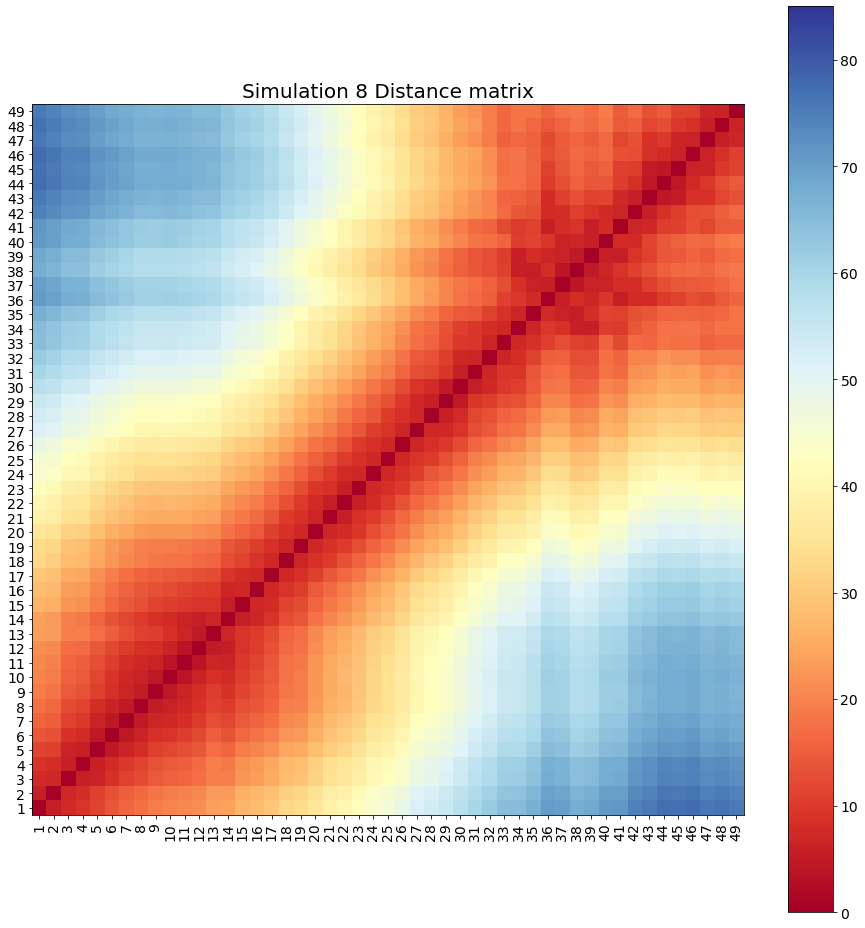

In [13]:
#means distance matrix 
#dont forget to change figure number 
fig,axs=plt.subplots(ncols=1,nrows=1,figsize=(13,13))
#,  gridspec_kw={'width_ratios': [15, 1],
 #       'height_ratios':[1,3]})
bull_dist_mat_means=pd.read_csv("bull_pairwise_dist_means.csv")
#bull_dist_mat_stdev=pd.read_csv("bull_pairwise_dist_stdev.csv")
#simulations 13 and 15 need to be removed- be careful not to include them
#only equilibrated frames in this csv file
sim=8
bull_res1=bull_dist_mat_means[bull_dist_mat_means.sim==sim]['res1']
bull_temp_means=bull_dist_mat_means[bull_dist_mat_means.sim==sim].iloc[:,2:]
bull_temp_means=bull_temp_means.set_index(bull_res1.values)
bull_temp_means.values[[np.arange(bull_temp_means.shape[0])]*2] = 0
bull_temp_means=bull_temp_means.sort_index(ascending=False)
plt.imshow(bull_temp_means,cmap="RdYlBu",vmin=0,vmax=85)
cbar=plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(14)
plt.xticks(range(len(bull_temp_means)),bull_temp_means.columns,rotation=90,fontsize=14)
plt.title('Simulation '+str(sim)+' Distance matrix',fontsize=20)
plt.yticks(range(len(bull_temp_means)),bull_temp_means.index,fontsize=14)
#plt.savefig('figures_for_publication/bull_distmat_sim8.png',dpi=400,bbox_inches='tight')
#del bull_temp_means
#del bull_dist_mat_means
plt.tight_layout()

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


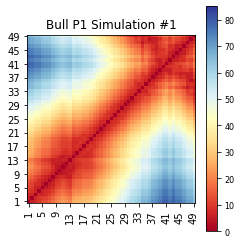

In [3]:
#means distance matrix 
fig,axs=plt.subplots(ncols=1,nrows=1,figsize=(3.5,3.5))
plt.rcParams["axes.labelweight"] = "regular"
plt.rcParams["font.weight"] = "regular"
#,  gridspec_kw={'width_ratios': [15, 1],
 #       'height_ratios':[1,3]})
bull_dist_mat_means=pd.read_csv("bull_pairwise_dist_means.csv")
#bull_dist_mat_stdev=pd.read_csv("bull_pairwise_dist_stdev.csv")
sim=1
bull_res1=bull_dist_mat_means[bull_dist_mat_means.sim==sim]['res1']
bull_temp_means=bull_dist_mat_means[bull_dist_mat_means.sim==sim].iloc[:,2:]
bull_temp_means=bull_temp_means.set_index(bull_res1.values)
bull_temp_means.values[[np.arange(bull_temp_means.shape[0])]*2] = 0
bull_temp_means=bull_temp_means.sort_index(ascending=False)
plt.imshow(bull_temp_means,cmap="RdYlBu",vmin=0,vmax=85)
cbar=plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(8)
plt.xticks(range(len(bull_temp_means))[::4],bull_temp_means.columns[::4],rotation=90,fontsize=10)
plt.title('Bull P1 Simulation #'+str(sim),fontsize=12)
plt.yticks(range(len(bull_temp_means))[::4],bull_temp_means.index[::4],fontsize=10)
#plt.savefig('figures_for_publication/bull_distmat_sim'+str(sim)+'.png',dpi=400,bbox_inches='tight')
#del bull_temp_means
#del bull_dist_mat_means
plt.tight_layout()

In [4]:
bull_sequence='ARYRCCLTHSGSRCRRRRRRRCRRRRRRFGRRRRRRVCCRRYTVIRCRR'
bull_hairpin_min=[]
unique_identifier=[]
already_pair=[]
for index,value in enumerate(bull_temp_means[bull_temp_means!=0].idxmin().values):
    if abs(index+1-value)!=1:
        bull_hairpin_min.append([index+1,value])
for residue_pair in bull_hairpin_min:
    if bull_temp_means[bull_temp_means!=0][str(residue_pair[0])][residue_pair[1]] in unique_identifier:
            if [residue_pair[0],residue_pair[1]] in already_pair:
                continue
            elif [residue_pair[1],residue_pair[0]] in already_pair:
                continue
            else:
                print(residue_pair,bull_sequence[residue_pair[0]-1],
                      bull_sequence[residue_pair[1]-1],
                      format(bull_temp_means[bull_temp_means!=0][str(residue_pair[0])][residue_pair[1]],'2.2f'))
    else:
        print(residue_pair,bull_sequence[residue_pair[0]-1],
              bull_sequence[residue_pair[1]-1],
              format(bull_temp_means[bull_temp_means!=0][str(residue_pair[0])][residue_pair[1]],'2.2f'))
    unique_identifier.append(bull_temp_means[bull_temp_means!=0][str(residue_pair[0])][residue_pair[1]])
    already_pair.append([residue_pair[0],residue_pair[1]])

[13, 10] R S 4.87
1
[14, 11] C G 4.87
2
[18, 14] R C 6.98
3
[32, 49] R R 6.32
4
[33, 35] R R 6.83
5
[34, 47] R C 4.82
6
[36, 48] R R 3.53
7
[46, 44] R V 5.29
8
[49, 34] R R 6.20
9


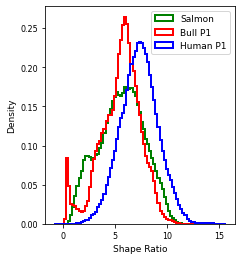

In [12]:
fig = plt.subplots(figsize=(3.4,4))
plt.hist(salmon_rg_ree_hier.ratio.values,label='Salmon',histtype='step',color='green',linestyle=('solid'),density=True,bins=np.arange(np.array([salmon_rg_ree_hier.ratio.values,
                                           p1_rg_ree_hier.ratio.values,
                                           bull_rg_ree.ratio.values]).min()-1,
                                 np.array([salmon_rg_ree_hier.ratio.values,
                                           p1_rg_ree_hier.ratio.values,
                                           bull_rg_ree.ratio.values]).max()+1,0.2),linewidth=2)
plt.hist(bull_rg_ree.ratio.values,label='Bull P1',histtype='step',color='red',linestyle=('solid'),density=True,bins=np.arange(np.array([salmon_rg_ree_hier.ratio.values,
                                           p1_rg_ree_hier.ratio.values,
                                           bull_rg_ree.ratio.values]).min()-1,
                                 np.array([salmon_rg_ree_hier.ratio.values,
                                           p1_rg_ree_hier.ratio.values,
                                           bull_rg_ree.ratio.values]).max()+1,0.2),linewidth=2)
plt.hist(p1_rg_ree_hier.ratio.values,label='Human P1',histtype='step',color='blue',linestyle=('solid'),density=True,bins=np.arange(np.array([salmon_rg_ree_hier.ratio.values,
                                           p1_rg_ree_hier.ratio.values,
                                           bull_rg_ree.ratio.values]).min()-1,
                                 np.array([salmon_rg_ree_hier.ratio.values,
                                           p1_rg_ree_hier.ratio.values,
                                           bull_rg_ree.ratio.values]).max()+1,0.2),linewidth=2)
plt.legend(fontsize=9)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Shape Ratio",fontsize=9)
plt.ylabel("Density",fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.savefig('figures_for_publication/ratio_comparison.png',dpi=500,bbox_inches='tight')

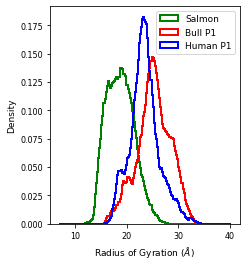

In [14]:
fig = plt.subplots(figsize=(3.4,4))
plt.hist(salmon_rg_ree_hier.Rg.values,label='Salmon',histtype='step',linestyle=('solid'),color='green',density=True,bins=np.arange(np.array([salmon_rg_ree_hier.Rg.values,
                                           p1_rg_ree_hier.Rg.values,
                                           bull_rg_ree.Rg.values]).min()-5,
                                 np.array([salmon_rg_ree_hier.Rg.values,
                                           p1_rg_ree_hier.Rg.values,
                                           bull_rg_ree.Rg.values]).max()+5,0.2),linewidth=2)
plt.hist(bull_rg_ree.Rg.values,label='Bull P1',histtype='step',linestyle=('solid'),color='red',density=True,bins=np.arange(np.array([salmon_rg_ree_hier.Rg.values,
                                           p1_rg_ree_hier.Rg.values,
                                           bull_rg_ree.Rg.values]).min()-5,
                                 np.array([salmon_rg_ree_hier.Rg.values,
                                           p1_rg_ree_hier.Rg.values,
                                           bull_rg_ree.Rg.values]).max()+5,0.2),linewidth=2)
plt.hist(p1_rg_ree_hier.Rg.values,label='Human P1',histtype='step',linestyle=('solid'),color='blue',density=True,bins=np.arange(np.array([salmon_rg_ree_hier.Rg.values,
                                           p1_rg_ree_hier.Rg.values,
                                           bull_rg_ree.Rg.values]).min()-5,
                                 np.array([salmon_rg_ree_hier.Rg.values,
                                           p1_rg_ree_hier.Rg.values,
                                           bull_rg_ree.Rg.values]).max()+5,0.2),linewidth=2)

plt.legend(fontsize=9)
#plt.title("Rg distribution",fontsize=25)
plt.ylabel('Density',fontsize=9)
plt.xlabel('Radius of Gyration ('+r'$\AA$'+')',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.savefig('figures_for_publication/rg_comparison.png',dpi=500,bbox_inches='tight')


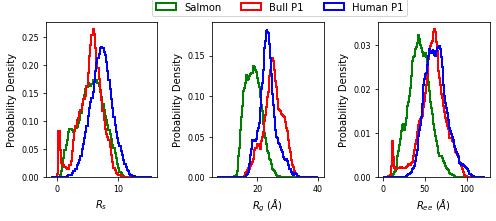

In [11]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(7,3))
#for shape ratio
ax[0].hist(salmon_rg_ree_hier.ratio.values,label='Salmon',histtype='step',color='green',linestyle=('solid'),density=True,bins=np.arange(np.array([salmon_rg_ree_hier.ratio.values,
                                           p1_rg_ree_hier.ratio.values,
                                           bull_rg_ree.ratio.values]).min()-1,
                                 np.array([salmon_rg_ree_hier.ratio.values,
                                           p1_rg_ree_hier.ratio.values,
                                           bull_rg_ree.ratio.values]).max()+1,0.2),linewidth=2)
ax[0].hist(bull_rg_ree.ratio.values,label='Bull P1',histtype='step',color='red',linestyle=('solid'),density=True,bins=np.arange(np.array([salmon_rg_ree_hier.ratio.values,
                                           p1_rg_ree_hier.ratio.values,
                                           bull_rg_ree.ratio.values]).min()-1,
                                 np.array([salmon_rg_ree_hier.ratio.values,
                                           p1_rg_ree_hier.ratio.values,
                                           bull_rg_ree.ratio.values]).max()+1,0.2),linewidth=2)
ax[0].hist(p1_rg_ree_hier.ratio.values,label='Human P1',histtype='step',color='blue',linestyle=('solid'),density=True,bins=np.arange(np.array([salmon_rg_ree_hier.ratio.values,
                                           p1_rg_ree_hier.ratio.values,
                                           bull_rg_ree.ratio.values]).min()-1,
                                 np.array([salmon_rg_ree_hier.ratio.values,
                                           p1_rg_ree_hier.ratio.values,
                                           bull_rg_ree.ratio.values]).max()+1,0.2),linewidth=2)

ax[0].set_xlabel(r'$R_{s}$',fontsize=10)


ax[0].set_ylabel("Probability Density",fontsize=10)
plt.setp(ax[0].get_yticklabels(), fontsize=8)
plt.setp(ax[0].get_xticklabels(), fontsize=8)
fig.legend(fontsize=10,ncol=3,loc=(0.306,0.925))
#for Rg
ax[1].hist(salmon_rg_ree_hier.Rg.values,label='Salmon',histtype='step',linestyle=('solid'),color='green',density=True,bins=np.arange(np.array([salmon_rg_ree_hier.Rg.values,
                                           p1_rg_ree_hier.Rg.values,
                                           bull_rg_ree.Rg.values]).min()-5,
                                 np.array([salmon_rg_ree_hier.Rg.values,
                                           p1_rg_ree_hier.Rg.values,
                                           bull_rg_ree.Rg.values]).max()+5,0.2),linewidth=2)
ax[1].hist(bull_rg_ree.Rg.values,label='Bull P1',histtype='step',linestyle=('solid'),color='red',density=True,bins=np.arange(np.array([salmon_rg_ree_hier.Rg.values,
                                           p1_rg_ree_hier.Rg.values,
                                           bull_rg_ree.Rg.values]).min()-5,
                                 np.array([salmon_rg_ree_hier.Rg.values,
                                           p1_rg_ree_hier.Rg.values,
                                           bull_rg_ree.Rg.values]).max()+5,0.2),linewidth=2)
ax[1].hist(p1_rg_ree_hier.Rg.values,label='Human P1',histtype='step',linestyle=('solid'),color='blue',density=True,bins=np.arange(np.array([salmon_rg_ree_hier.Rg.values,
                                           p1_rg_ree_hier.Rg.values,
                                           bull_rg_ree.Rg.values]).min()-5,
                                 np.array([salmon_rg_ree_hier.Rg.values,
                                           p1_rg_ree_hier.Rg.values,
                                           bull_rg_ree.Rg.values]).max()+5,0.2),linewidth=2)



ax[1].set_ylabel('Probability Density',fontsize=10)
ax[1].set_xlabel(r'$R_{g}$'+' ('+ r'$\AA$'+')',fontsize=10)
plt.setp(ax[1].get_yticklabels(), fontsize=8)
plt.setp(ax[1].get_xticklabels(), fontsize=8)

#for Ree

ax[2].hist(salmon_rg_ree_hier.Ree.values,label='Salmon',histtype='step',linestyle=('solid'),color='green',density=True,bins=np.arange(np.array([salmon_rg_ree_hier.Ree.values,
                                           p1_rg_ree_hier.Ree.values,
                                           bull_rg_ree.Ree.values]).min()-5,
                                 np.array([salmon_rg_ree_hier.Ree.values,
                                           p1_rg_ree_hier.Ree.values,
                                           bull_rg_ree.Ree.values]).max()+5,1),linewidth=2)
ax[2].hist(bull_rg_ree.Ree.values,label='Bull P1',histtype='step',linestyle=('solid'),color='red',density=True,bins=np.arange(np.array([salmon_rg_ree_hier.Ree.values,
                                           p1_rg_ree_hier.Ree.values,
                                           bull_rg_ree.Ree.values]).min()-5,
                                 np.array([salmon_rg_ree_hier.Ree.values,
                                           p1_rg_ree_hier.Ree.values,
                                           bull_rg_ree.Ree.values]).max()+5,1),linewidth=2)
ax[2].hist(p1_rg_ree_hier.Ree.values,label='Human P1',histtype='step',linestyle=('solid'),color='blue',density=True,bins=np.arange(np.array([salmon_rg_ree_hier.Ree.values,
                                           p1_rg_ree_hier.Ree.values,
                                           bull_rg_ree.Ree.values]).min()-5,
                                 np.array([salmon_rg_ree_hier.Ree.values,
                                           p1_rg_ree_hier.Ree.values,
                                           bull_rg_ree.Ree.values]).max()+5,1),linewidth=2)
ax[2].set_ylabel('Probability Density',fontsize=10)
#ax[2].set_xlabel('End-to-End Distance ('+r'$\AA$'+')',fontsize=10)
ax[2].set_xlabel(r'$R_{ee}$'+' ('+ r'$\AA$'+')',fontsize=10)
plt.setp(ax[2].get_yticklabels(), fontsize=8)
plt.setp(ax[2].get_xticklabels(), fontsize=8)
plt.tight_layout()
plt.savefig('figures_for_publication/overall_rg_ree_ratio_comparison.png',dpi=500,bbox_inches='tight')


In [17]:
salmon_rg_ree_hier.ratio.std()

2.166641143607048

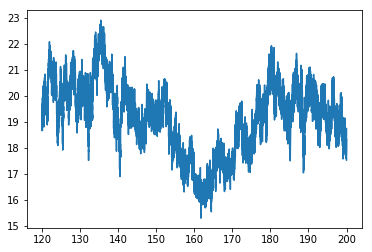

In [15]:
plt.plot(bull_rg_ree[bull_rg_ree.sim==7].frames.values/500,bull_rg_ree[bull_rg_ree.sim==7].Rg.values)